In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
PATH = '/content/drive/MyDrive/'

# **1. 필수 모듈 설치 및 불러오기**

In [3]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 59.2 MB/s 
     |████████████████████████████████| 453 kB 68.8 MB/s 


In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np

# **2. 단어 빈도 수 체크하기**

In [15]:
with open(PATH + '대구시뉴스기사크롤링_train_ver07.csv', 'r', encoding='utf-8') as f:
    text = f.read()

okt = Okt()
# 명사만 추출
nouns = okt.nouns(text) 

# 단어의 길이가 1개인 것은 제외
words = [n for n in nouns if len(n) > 1] 

# 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함
c = Counter(words) 
print(c)

Counter({'경북': 216, '개최': 199, '홍준표': 89, '국제': 87, '의회': 85, '공사': 83, '지원': 82, '협약': 78, '산업': 76, '축제': 75, '지역': 71, '교육': 69, '식품': 68, '청년': 66, '사업': 61, '전국': 59, '확진': 58, '교육청': 56, '의원': 56, '교육감': 51, '진흥': 51, '페스티벌': 50, '원장': 50, '가스': 50, '행복': 49, '한국': 49, '대상': 48, '연고': 47, '문화': 46, '신규': 45, '대학': 44, '개막': 44, '보건': 42, '은행': 40, '오페라': 39, '연구원': 39, '박람회': 38, '건설': 37, '순천': 37, '추진': 37, '안전': 36, '내정': 35, '태풍': 35, '방문': 35, '광주': 34, '본부': 34, '협의': 33, '체결': 33, '학교': 33, '정책': 32, '현장': 32, '대회': 32, '코로나': 31, '날씨': 31, '포항': 31, '신천': 31, '달서구': 30, '가을': 30, '이전': 30, '행사': 30, '수성': 30, '동정': 30, '통합': 30, '스트리트': 29, '모터': 29, '운영': 29, '분양': 29, '군부': 29, '안철수': 29, '기업': 29, '공항': 29, '폐지': 28, '공원': 28, '농구단': 28, '한의대': 27, '교통': 26, '홍보': 26, '가톨릭대': 26, '생활': 25, '중구': 25, '카드': 25, '청소년': 25, '업무': 24, '부상': 24, '피해': 24, '체험': 24, '참가': 24, '해제': 24, '우수': 24, '포토': 24, '남구': 23, '최고': 23, '군위': 23, '이슬람': 22, '사원': 22, '오늘': 22, '수성구': 22,

# **3. WordCloud 만들기**
* WordCloud 파라미터 구성
```
font_path : 폰트 저장 위치
background_color : 바탕색 지정
mask : WordCloud 모양을 내가 원하는 모양으로 지정


(-0.5, 1659.5, 1499.5, -0.5)

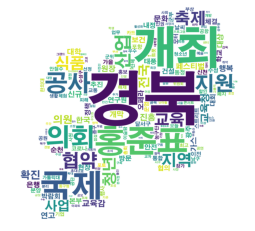

In [28]:
import numpy as np
im = Image.open(PATH + '대구모양.jpg')
mask_arr = np.array(im)

wc = WordCloud(font_path = PATH + 'H2GTRE.TTF', background_color='white', width=1000, height=1000, scale=2.0, max_font_size=250, mask = mask_arr)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)
plt.axis('off')

In [29]:
wc.to_file('대구데이main.png')